In [4]:
from deap import base, creator, tools, algorithms
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import random

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import subprocess
import numpy as np

In [5]:
df_citty = pd.read_csv('Average_status.csv')
display(df_citty)

df_citty['status_3_ratio_mean'] = df_citty['status_3_ratio_mean']*df_citty['ratios_length']*17


#sort by status_3_ratio_mean
df_citty = df_citty.sort_values(by='status_3_ratio_mean', ascending=True)
display(df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']])
df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']].to_csv('AllStation.csv', index=False)



,Unnamed: 0,slug,status_3_ratio_mean,status_3_ratio_var,latitude,longitude,ratios,ratios_length,minCapacity,maxCapacity
0,329,x5623z,0.759760,0.182567,55.732861,12.386630,[0.7597597597597597],1,50.0,50.0
1,47,5nykwy,0.579191,0.243785,55.858522,9.851593,[0.5791907514450867],1,75.0,75.0
2,196,jq8xwm,0.557396,0.246763,55.723784,9.583650,[0.5573961735884274],1,50.0,50.0
3,12,2j72qy,0.540725,0.150718,55.614600,12.355200,"[0.5385325334563913, 0.5429164743885556]",2,43.0,50.0
4,214,kj9rwe,0.536461,0.119460,55.626754,12.575313,"[0.41407338597306087, 0.6588481189038551]",2,43.0,50.0
...,...,...,...,...,...,...,...,...,...,...
395,90,7nyr93,0.009227,0.009144,56.781975,8.836123,[0.00922722029988466],1,50.0,50.0
396,349,y67jq,0.008146,0.002712,56.964766,9.241929,"[0.0349002849002849, 0.002849002849002849, 0.0...",5,11.0,150.0
397,46,5np96k,0.007568,0.003728,57.061677,10.182387,"[0.0122537241710716, 0.0028832292167227293]",2,90.0,90.0
398,31,39xd56,0.006498,0.003208,55.414030,11.342991,"[0.003716608594657375, 0.0, 0.0111394755163611...",4,50.0,60.0


,Unnamed: 0,longitude,latitude,status_3_ratio_mean
399,114,10.648394,55.501504,0.078868
395,90,8.836123,56.781975,0.156863
397,46,10.182387,57.061677,0.257328
394,267,9.129680,55.130120,0.369053
398,31,11.342991,55.414030,0.441866
...,...,...,...,...
76,118,11.361842,55.387910,125.194001
64,308,9.716938,55.534483,128.493454
72,255,10.419778,55.352714,138.276680
5,275,12.161393,55.489341,139.302812


In [3]:
weights = {
    "traffic_weight": 0,
    "apartments_weight": 0,
    "cinemas_weight": 0,
    "clinics_weight": 0,
    "colleges_weight": 0,
    "communityCentres_weight": 0,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0,
    "eventsVenues_weight": 0,
    "fastFoods_weight": 0,
    "hospitals_weight": 0,
    "hotels_weight": 0,
    "leisureFitnessCentres_weight": 0,
    "leisureStadiums_weight": 0,
    "motorwayLinks_weight": 0,
    "motorways_weight": 0,
    "parkings_weight": 0,
    "placesOfWorship_weight": 0,
    "restaurants_weight": 0,
    "shopMalls_weight": 0,
    "shopSupermarkets_weight": 0,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0,
    "stadiums_weight": 0,
    "substationMinorDistributions_weight": 0,
    "theatres_weight": 0,
    "universities_weight": 0
}
with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")

minDistance = {
    'traffic_distance': 0.1,
    'apartments_distance': 0.1,
    'cinemas_distance': 0.1,
    'clinics_distance': 0.1,
    'colleges_distance': 0.1,
    'communityCentres_distance': 0.1,
    'conferenceCentres_distance': 0.1,
    'dentists_distance': 0.1,
    'eventsVenues_distance': 0.1,
    'fastFoods_distance': 0.1,
    'hospitals_distance': 0.1,
    'hotels_distance': 0.1,
    'leisureFitnessCentres_distance': 0.1,
    'leisureStadiums_distance': 0.1,
    'motorwayLinks_distance': 0.1,
    'motorways_distance': 0.1,
    'parkings_distance': 0.1,
    'placesOfWorship_distance': 0.1,
    'restaurants_distance': 0.1,
    'shopMalls_distance': 0.1,
    'shopSupermarkets_distance': 0.1,
    'sportsCentres_distance': 0.1,
    'sportsHalls_distance': 0.1,
    'stadiums_distance': 0.1,
    'substationMinorDistributions_distance': 0.1,
    'theatres_distance': 0.1,
    'universities_distance': 0.1
}


with open("minDistance.txt", "w") as file:
    for name, value in minDistance.items():
        file.write(f"{name} {float(value)}\n")

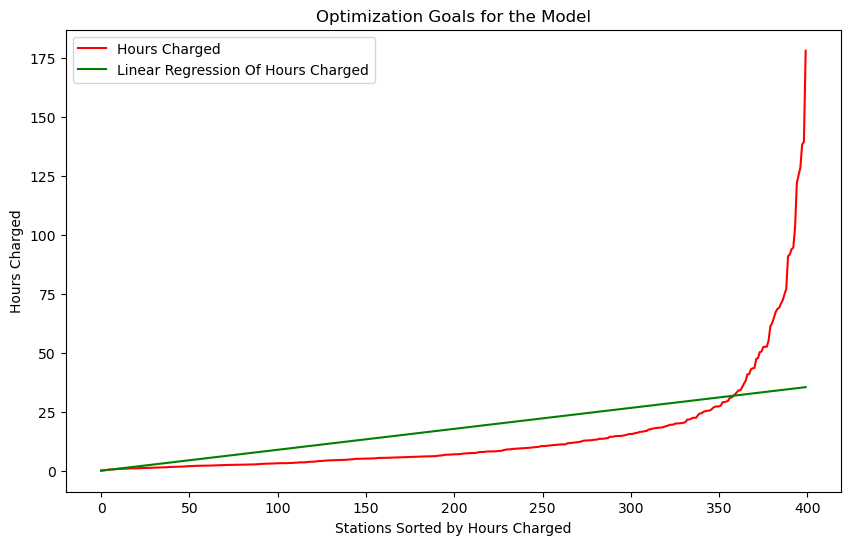

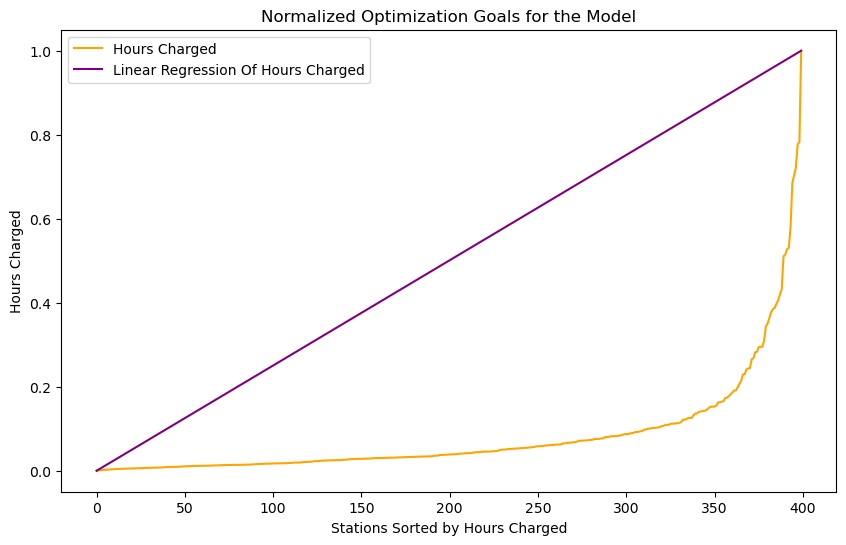

In [6]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y_original = df_citty['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_original)

# Fit the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y_original)

# Predict using the scaled features
y_lin = model.predict(X)
y_scaled_lin = scaler_y.fit_transform(y_lin)

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')

plt.title('Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')

plt.title('Normalized Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

In [5]:
def custom_cxBlend(ind1, ind2, alpha):
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i], ind2[i] = ind1[i] + gamma * (ind2[i] - ind1[i]), ind2[i] + gamma * (ind1[i] - ind2[i])
        ind1[i], ind2[i] = max(0, ind1[i]), max(0, ind2[i])  # Ensure non-negative
    return ind1, ind2

def custom_mutGaussian(individual, mu, sigma, indpb):
    size = len(individual)
    for i in range(size):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
            individual[i] = max(0, individual[i])  # Ensure non-negative
    return individual,


In [6]:
def evaluate(individual):
    # Convert GA individual (set of weights) into your weights' dictionary structure
    new_weights = {name: weight for name, weight in zip(weights.keys(), individual)}

    # Write these new weights into the format your C++ program expects
    with open("weights_float.txt", "w") as file:
        for name, value in new_weights.items():
            file.write(f"{name} {value}\n")

    # Run the C++ program
    try:
        subprocess.run(['./gravityscore', 'AllStation.csv'], check=True)
        
        # Process the output CSV file
        df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
        df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

        # Assuming df_gravity['gravity'] needs to be scaled between 0 and 1 to compare with y_true
        # If df_gravity['gravity'] is already scaled, this step can be adjusted or removed
        scaler = MinMaxScaler()
        #y_pred_scaled = scaler.fit_transform(df_gravity[['gravity']]).flatten()
     
        

        mse = mean_squared_error(y_original, df_gravity['gravity'])
        rmse = np.sqrt(mse)
    except subprocess.CalledProcessError as e:
        print(f"Error running C++ program: {e}")
        rmse = float('inf')  # Assign a high MSE value in case of error

    return (rmse,)

# Genetic algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 0.01)  # Adjust range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(weights))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", custom_cxBlend, alpha=0.5)
toolbox.register("mutate", custom_mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parameters for the GA
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
number_of_generations = 30

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("var", np.var)
stats.register("std", np.std)


population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)  # To keep track of the best individual ever found

final_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg    	min    	var      	std     
0  	50    	25.9938	25.6771	0.0366365	0.191407
1  	28    	25.6763	23.2161	0.219181 	0.468168
2  	42    	25.2432	23.0304	0.564515 	0.751342
3  	40    	24.4281	22.9635	0.618653 	0.786545
4  	31    	23.9428	22.6694	1.17759  	1.08517 
5  	37    	23.6743	22.0721	2.12926  	1.4592  
6  	35    	22.9664	21.8508	0.378601 	0.615305
7  	41    	22.5273	21.8508	0.319495 	0.565239
8  	35    	22.3069	21.8173	0.10336  	0.321497
9  	45    	22.4997	21.8044	3.66832  	1.91528 
10 	39    	22.3135	21.7596	1.61367  	1.2703  
11 	37    	21.9565	21.7309	0.0475094	0.217966
12 	30    	22.0079	21.7309	0.443076 	0.66564 
13 	42    	21.8762	21.7205	0.0351699	0.187536
14 	40    	21.933 	21.715 	0.334759 	0.578584
15 	37    	22.0235	21.7008	1.08584  	1.04204 
16 	39    	22.1438	21.7014	1.66141  	1.28896 
17 	30    	21.9522	21.6707	0.695193 	0.833782
18 	42    	22.2215	21.675 	3.85048  	1.96226 
19 	45    	21.9793	21.6623	0.404718 	0.636175
20 	33    	21.8181	21.6558	0.29791

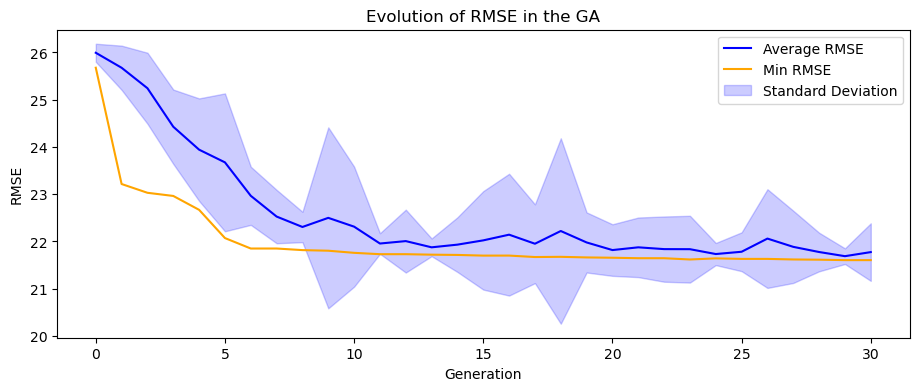

In [10]:
# Assuming logbook is already defined and populated
gen = np.array(logbook.select("gen"))
avg_mse = np.array(logbook.select("avg"))
min_mse = np.array(logbook.select("min"))
std_mse = np.array(logbook.select("std"))

# Calculate the upper and lower bounds for the shaded area
upper_bound = avg_mse + std_mse
lower_bound = avg_mse - std_mse

# Plot the graph
plt.figure(figsize=(11, 4))
plt.title("Evolution of RMSE in the GA")
plt.plot(gen, avg_mse, label="Average RMSE", color="blue")
plt.plot(gen, min_mse, label="Min RMSE", color="orange")
plt.fill_between(gen, lower_bound, upper_bound, color='blue', alpha=0.2, label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [11]:
display(hof.items)
# Assuming 'hof' is your HallOfFame object
best_individual = hof[0]  # The best individual
best_weights = {name: weight for name, weight in zip(weights.keys(), best_individual)}
best_mse = best_individual.fitness.values[0]

print("Best RMSE:", best_mse)
print("Best Weights:")
for name, weight in best_weights.items():
    print(f"{name}: {weight}")

[[0,
  0.0009170220089808314,
  0.0003695260891993867,
  0.06816398784563084,
  0.04516284488369832,
  3.752127410133192e-06,
  0,
  0.04454496428452166,
  0.00464102768317852,
  0.1784694398954507,
  0.012237558734649497,
  0.0030296000484235936,
  0.0029541970112504264,
  0.0007992050029449315,
  0.10788956583509418,
  0.026636366560840775,
  0.03238725958418013,
  0.02349285891361788,
  0.02359104950734122,
  0.047809737636703376,
  2.1277026279482327e-05,
  0,
  0.003479494421348886,
  0.10188558996882979,
  0.05602740409259743,
  0.005573301139133856,
  0]]

Best RMSE: 21.605085147470465
Best Weights:
traffic_weight: 0
apartments_weight: 0.0009170220089808314
cinemas_weight: 0.0003695260891993867
clinics_weight: 0.06816398784563084
colleges_weight: 0.04516284488369832
communityCentres_weight: 3.752127410133192e-06
conferenceCentres_weight: 0
dentists_weight: 0.04454496428452166
eventsVenues_weight: 0.00464102768317852
fastFoods_weight: 0.1784694398954507
hospitals_weight: 0.012237558734649497
hotels_weight: 0.0030296000484235936
leisureFitnessCentres_weight: 0.0029541970112504264
leisureStadiums_weight: 0.0007992050029449315
motorwayLinks_weight: 0.10788956583509418
motorways_weight: 0.026636366560840775
parkings_weight: 0.03238725958418013
placesOfWorship_weight: 0.02349285891361788
restaurants_weight: 0.02359104950734122
shopMalls_weight: 0.047809737636703376
shopSupermarkets_weight: 2.1277026279482327e-05
sportsCentres_weight: 0
sportsHalls_weight: 0.003479494421348886
stadiums_weight: 0.10188558996882979
substationMinorDistributions_we

In [12]:
with open("weights_float.txt", "w") as file:
    for name, value in best_weights.items():
        file.write(f"{name} {float(value)}\n")

In [13]:
# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

C++ program output:
 Time taken: 8703 milliseconds



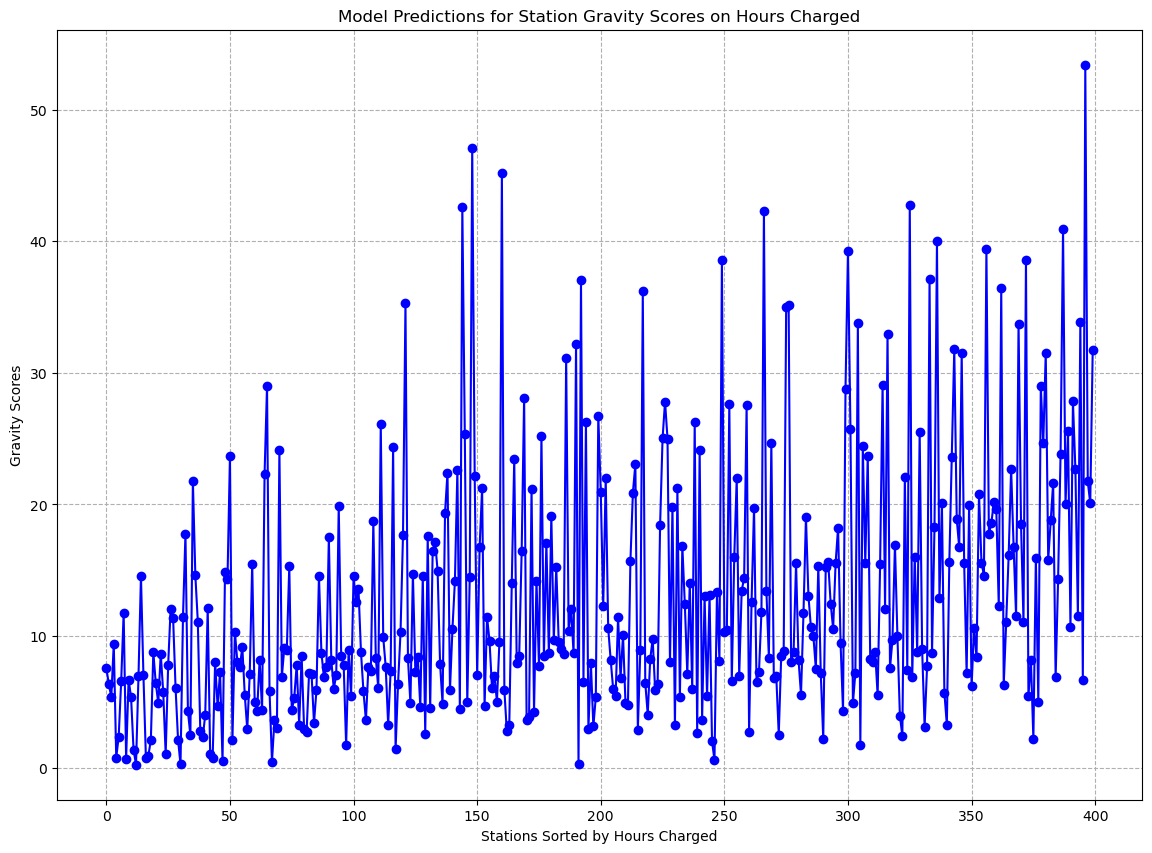

In [14]:
df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores on Hours Charged')
plt.grid(True, which="both", ls="--")
plt.show()

Mean Squared Error (MSE): 466.77970422944895
Root Mean Squared Error (RMSE): 21.605085147470465


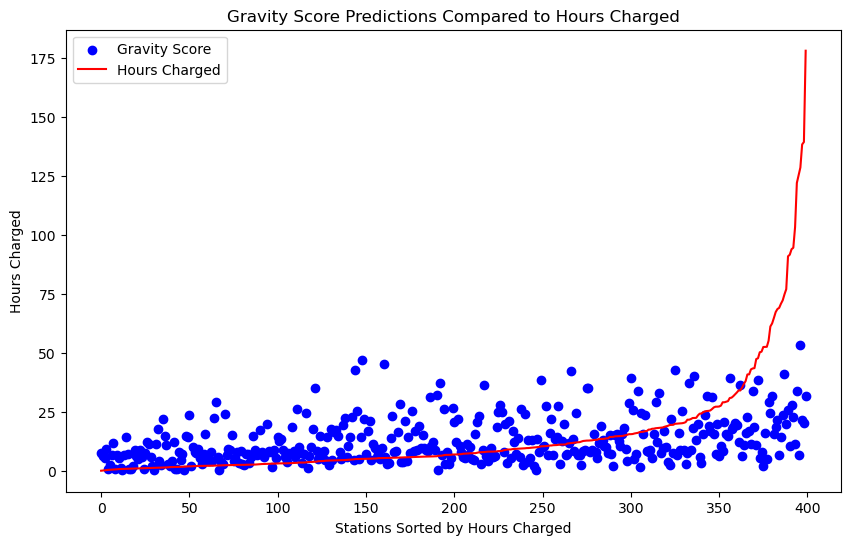

Mean Squared Error (MSE): 148.34317836260436
Root Mean Squared Error (RMSE): 12.17962143757368


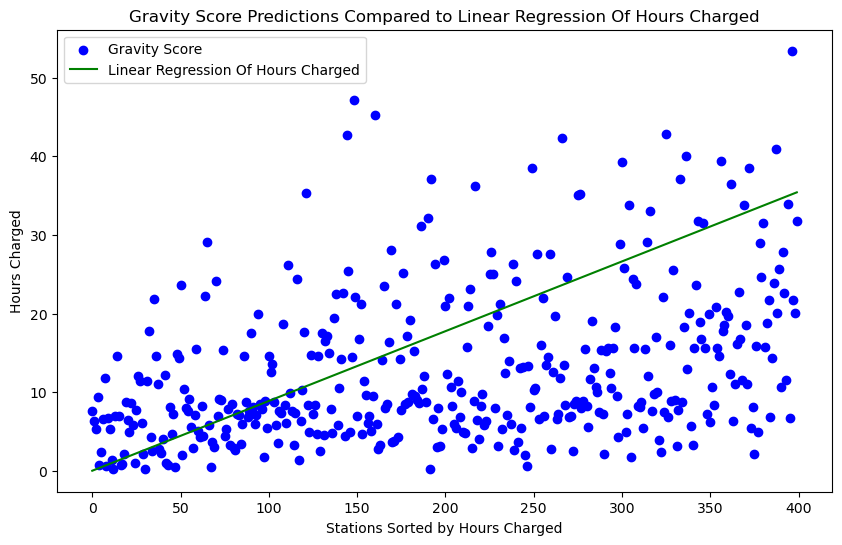

In [16]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y, y_original)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y, y_lin)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


In [17]:
def evaluate(individual):
    # Convert GA individual (set of weights) into your weights' dictionary structure
    new_weights = {name: weight for name, weight in zip(weights.keys(), individual)}

    # Write these new weights into the format your C++ program expects
    with open("weights_float.txt", "w") as file:
        for name, value in new_weights.items():
            file.write(f"{name} {value}\n")

    # Run the C++ program
    try:
        subprocess.run(['./gravityscore', 'AllStation.csv'], check=True)
        
        # Process the output CSV file
        df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
        df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

        # Assuming df_gravity['gravity'] needs to be scaled between 0 and 1 to compare with y_true
        # If df_gravity['gravity'] is already scaled, this step can be adjusted or removed
        scaler = MinMaxScaler()
        #y_pred_scaled = scaler.fit_transform(df_gravity[['gravity']]).flatten()

        mse = mean_squared_error(y_lin, df_gravity['gravity'])
        rmse = np.sqrt(mse)
    except subprocess.CalledProcessError as e:
        print(f"Error running C++ program: {e}")
        rmse = float('inf')  # Assign a high MSE value in case of error

    return (rmse,)

# Genetic algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 0.01)  # Adjust range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(weights))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", custom_cxBlend, alpha=0.5)
toolbox.register("mutate", custom_mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parameters for the GA
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
number_of_generations = 30

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("var", np.var)
stats.register("std", np.std)


population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)  # To keep track of the best individual ever found

final_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)


c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	min   	var    	std     
0  	50    	18.767	18.023	0.15693	0.396144
1  	38    	18.1735	11.9059	1.12575	1.06102 
2  	36    	17.4827	11.7691	2.259  	1.503   
3  	33    	16.3108	11.645 	3.40167	1.84436 
4  	41    	14.9076	11.645 	2.77583	1.66608 
5  	39    	13.8748	11.5676	4.31617	2.07754 
6  	38    	12.6542	10.9231	1.56081	1.24932 
7  	39    	11.915 	10.8549	0.491604	0.701145
8  	38    	12.2167	10.9179	5.67322 	2.38185 
9  	40    	11.556 	10.9179	0.327799	0.572537
10 	41    	11.5904	10.9001	3.5424  	1.88213 
11 	41    	11.5753	10.7659	3.60535 	1.89877 
12 	38    	11.2383	10.7659	0.613237	0.783094
13 	33    	11.8183	10.7199	13.8903 	3.72696 
14 	30    	11.1122	10.6803	1.11138 	1.05422 
15 	42    	11.0108	10.6803	0.664758	0.815327
16 	44    	11.7386	10.6911	9.77693 	3.12681 
17 	39    	10.9974	10.7024	0.947502	0.973397
18 	41    	11.0043	10.6817	0.813608	0.902002
19 	34    	10.8019	10.6628	0.13004 	0.36061 
20 	37    	11.6934	10.6589	10.6421 	3.26223 
21 	35    	12.3701	10.

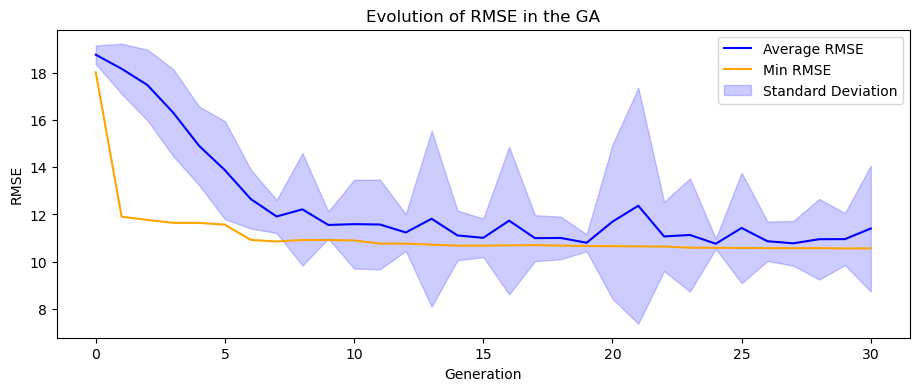

In [18]:
# Assuming logbook is already defined and populated
gen = np.array(logbook.select("gen"))
avg_mse = np.array(logbook.select("avg"))
min_mse = np.array(logbook.select("min"))
std_mse = np.array(logbook.select("std"))

# Calculate the upper and lower bounds for the shaded area
upper_bound = avg_mse + std_mse
lower_bound = avg_mse - std_mse

# Plot the graph
plt.figure(figsize=(11, 4))
plt.title("Evolution of RMSE in the GA")
plt.plot(gen, avg_mse, label="Average RMSE", color="blue")
plt.plot(gen, min_mse, label="Min RMSE", color="orange")
plt.fill_between(gen, lower_bound, upper_bound, color='blue', alpha=0.2, label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [19]:
display(hof.items)
# Assuming 'hof' is your HallOfFame object
best_individual = hof[0]  # The best individual
best_weights = {name: weight for name, weight in zip(weights.keys(), best_individual)}
best_mse = best_individual.fitness.values[0]

print("Best RMSE:", best_mse)
print("Best Weights:")
for name, weight in best_weights.items():
    print(f"{name}: {weight}")

[[0,
  0.013020803620594542,
  8.914836506796038e-05,
  0.05044043248665535,
  0.023629078699960445,
  0.06052956661123591,
  0.002228864000721831,
  0.012060727058256915,
  0.0078254979360184,
  0.08438839739569119,
  0.006203608183887592,
  0.0003179888631597091,
  0.005110500724733416,
  0.0031516632035784825,
  0.044317712816342156,
  0.029215833567085046,
  0.08162039103927429,
  0.0010795097351406447,
  0.002205968749757865,
  0,
  0.011643741100199712,
  0.0011138701504398237,
  0.03861830014075491,
  0.005513851266402256,
  0.053280480432216046,
  0.006458047190017242,
  0]]

Best RMSE: 10.560108142836967
Best Weights:
traffic_weight: 0
apartments_weight: 0.013020803620594542
cinemas_weight: 8.914836506796038e-05
clinics_weight: 0.05044043248665535
colleges_weight: 0.023629078699960445
communityCentres_weight: 0.06052956661123591
conferenceCentres_weight: 0.002228864000721831
dentists_weight: 0.012060727058256915
eventsVenues_weight: 0.0078254979360184
fastFoods_weight: 0.08438839739569119
hospitals_weight: 0.006203608183887592
hotels_weight: 0.0003179888631597091
leisureFitnessCentres_weight: 0.005110500724733416
leisureStadiums_weight: 0.0031516632035784825
motorwayLinks_weight: 0.044317712816342156
motorways_weight: 0.029215833567085046
parkings_weight: 0.08162039103927429
placesOfWorship_weight: 0.0010795097351406447
restaurants_weight: 0.002205968749757865
shopMalls_weight: 0
shopSupermarkets_weight: 0.011643741100199712
sportsCentres_weight: 0.0011138701504398237
sportsHalls_weight: 0.03861830014075491
stadiums_weight: 0.005513851266402256
substationM

In [20]:
with open("weights_float.txt", "w") as file:
    for name, value in best_weights.items():
        file.write(f"{name} {float(value)}\n")

In [21]:
# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

C++ program output:
 Time taken: 7762 milliseconds



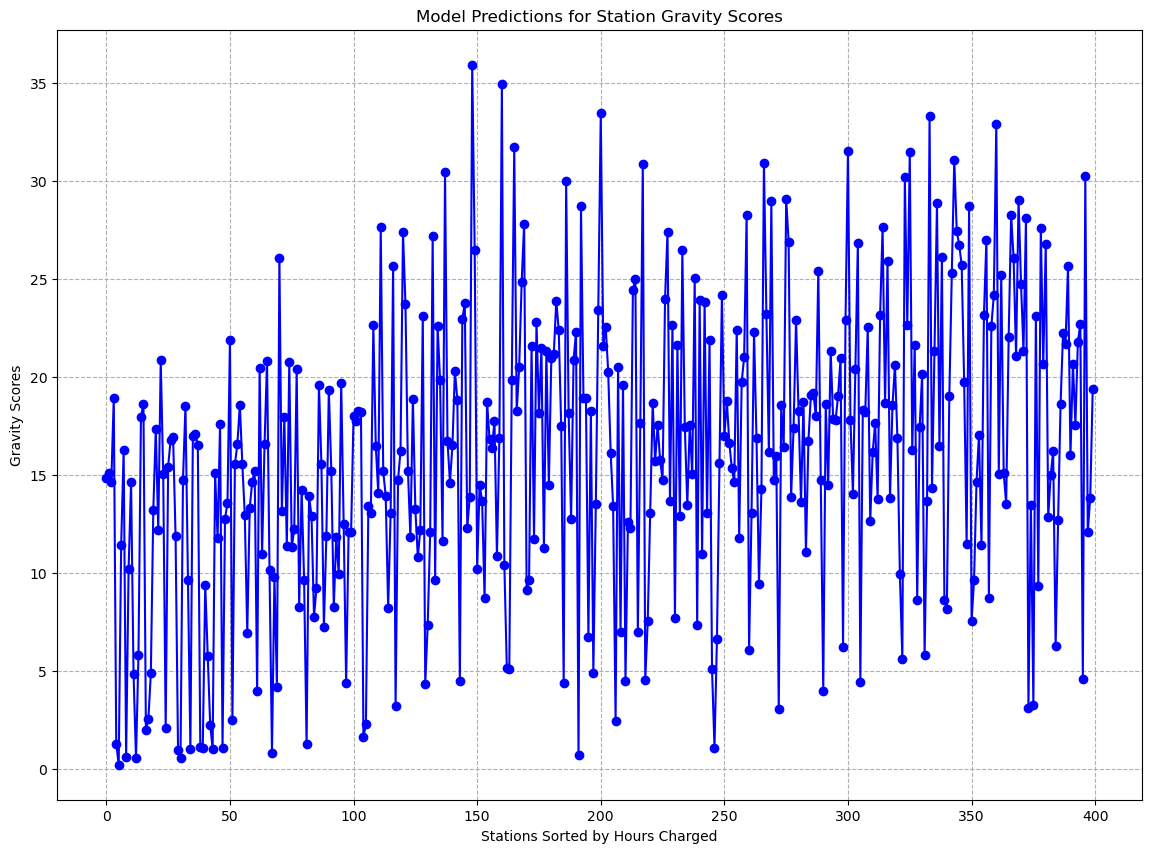

In [22]:
df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

Mean Squared Error (MSE): 515.8884116794457
Root Mean Squared Error (RMSE): 22.713177049445232


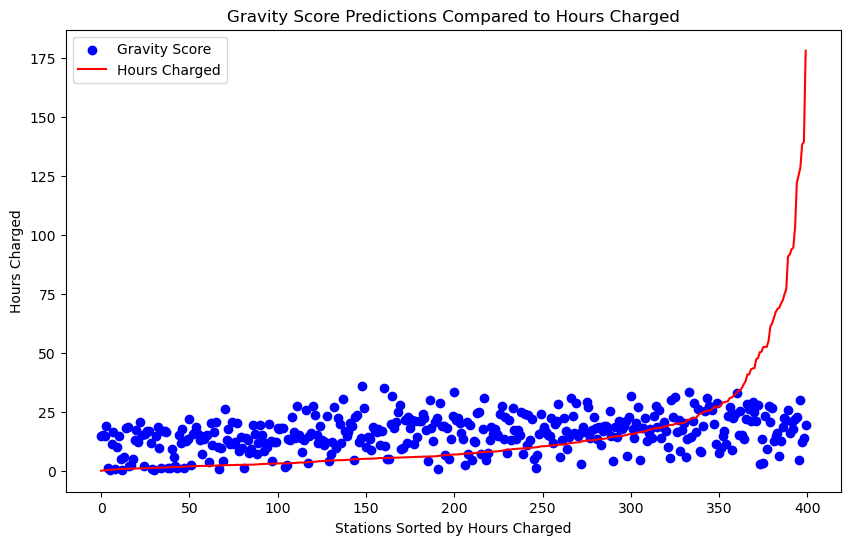

Mean Squared Error (MSE): 111.5158839884116
Root Mean Squared Error (RMSE): 10.560108142836967


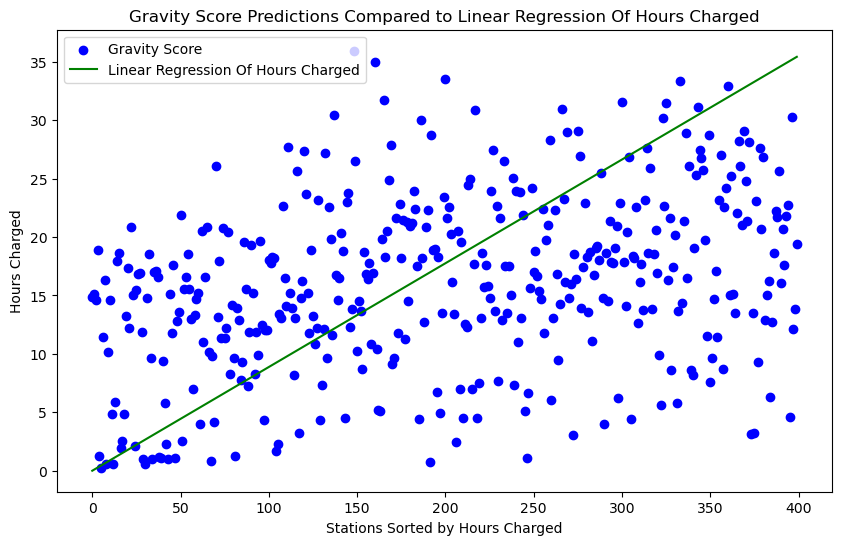

In [24]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y, y_original)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y, y_lin)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


In [25]:
def evaluate(individual):
    # Convert GA individual (set of weights) into your weights' dictionary structure
    new_weights = {name: weight for name, weight in zip(weights.keys(), individual)}

    # Write these new weights into the format your C++ program expects
    with open("weights_float.txt", "w") as file:
        for name, value in new_weights.items():
            file.write(f"{name} {value}\n")

    # Run the C++ program
    try:
        subprocess.run(['./gravityscore', 'AllStation.csv'], check=True)
        
        # Process the output CSV file
        df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
        df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

        # Assuming df_gravity['gravity'] needs to be scaled between 0 and 1 to compare with y_true
        # If df_gravity['gravity'] is already scaled, this step can be adjusted or removed
        scaler = MinMaxScaler()
        y_pred_scaled = scaler.fit_transform(df_gravity[['gravity']]).flatten()
     

        mse = mean_squared_error(y_scaled, y_pred_scaled)
        rmse = np.sqrt(mse)
    except subprocess.CalledProcessError as e:
        print(f"Error running C++ program: {e}")
        rmse = float('inf')  # Assign a high MSE value in case of error

    return (rmse,)

# Genetic algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 100)  # Adjust range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(weights))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", custom_cxBlend, alpha=0.5)
toolbox.register("mutate", custom_mutGaussian, mu=0, sigma=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parameters for the GA
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
number_of_generations = 30

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("var", np.var)
stats.register("std", np.std)


population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)  # To keep track of the best individual ever found

final_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)


c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	var       	std      
0  	50    	0.301419	0.227809	0.00182053	0.0426677
1  	41    	0.269687	0.186749	0.00119448	0.0345613
2  	39    	0.253193	0.179545	0.00168661	0.0410684
3  	33    	0.225679	0.179545	0.000608366	0.0246651
4  	36    	0.214953	0.172443	0.000903347	0.0300557
5  	40    	0.199459	0.1652  	0.000398901	0.0199725
6  	39    	0.192907	0.156895	0.000827643	0.0287688
7  	40    	0.175069	0.156793	0.000241106	0.0155276
8  	40    	0.169626	0.155578	0.000121497	0.0110225
9  	34    	0.163885	0.153392	2.6246e-05 	0.00512308
10 	34    	0.161037	0.150723	2.13147e-05	0.00461679
11 	38    	0.159742	0.150891	0.000104251	0.0102104 
12 	35    	0.158936	0.150536	8.85514e-05	0.00941017
13 	38    	0.158108	0.150864	0.000165499	0.0128646 
14 	38    	0.153648	0.148801	2.16031e-05	0.00464792
15 	46    	0.153398	0.147789	0.000131153	0.0114522 
16 	36    	0.151131	0.147097	1.17737e-05	0.00343128
17 	31    	0.150646	0.147097	3.64092e-05	0.00603401
18 	38    	0.152357	0.1465

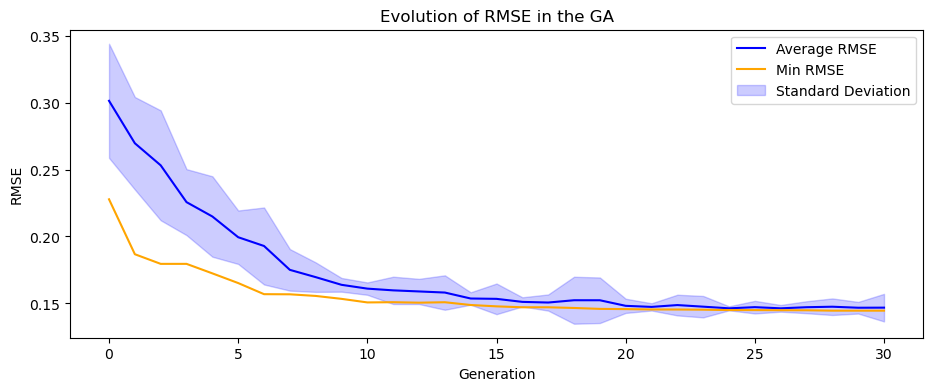

In [26]:
# Assuming logbook is already defined and populated
gen = np.array(logbook.select("gen"))
avg_mse = np.array(logbook.select("avg"))
min_mse = np.array(logbook.select("min"))
std_mse = np.array(logbook.select("std"))

# Calculate the upper and lower bounds for the shaded area
upper_bound = avg_mse + std_mse
lower_bound = avg_mse - std_mse

# Plot the graph
plt.figure(figsize=(11, 4))
plt.title("Evolution of RMSE in the GA")
plt.plot(gen, avg_mse, label="Average RMSE", color="blue")
plt.plot(gen, min_mse, label="Min RMSE", color="orange")
plt.fill_between(gen, lower_bound, upper_bound, color='blue', alpha=0.2, label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("RMSE")
plt.legend()
plt.show()
plt.show()

In [27]:
display(hof.items)
# Assuming 'hof' is your HallOfFame object
best_individual = hof[0]  # The best individual
best_weights = {name: weight for name, weight in zip(weights.keys(), best_individual)}
best_mse = best_individual.fitness.values[0]

print("Best RMSE:", best_mse)
print("Best Weights:")
for name, weight in best_weights.items():
    print(f"{name}: {weight}")

[[0,
  23.781907898059465,
  336.9062785253279,
  3.006622818712557,
  9.261942505614957,
  0,
  35.606541488784636,
  16.535994095277452,
  66.93865474496239,
  126.76899868667488,
  31.55415386485258,
  303.75196538960773,
  16.94456926610366,
  0,
  60.50251434050254,
  2.593746650234029,
  0,
  0.010426403527679014,
  0,
  16.206079712489355,
  15.84910564640157,
  60.911520933328234,
  35.65274206332491,
  45.11150974264184,
  18.337196828765656,
  110.15401257504546,
  73.33123201365447]]

Best RMSE: 0.14457167241223323
Best Weights:
traffic_weight: 0
apartments_weight: 23.781907898059465
cinemas_weight: 336.9062785253279
clinics_weight: 3.006622818712557
colleges_weight: 9.261942505614957
communityCentres_weight: 0
conferenceCentres_weight: 35.606541488784636
dentists_weight: 16.535994095277452
eventsVenues_weight: 66.93865474496239
fastFoods_weight: 126.76899868667488
hospitals_weight: 31.55415386485258
hotels_weight: 303.75196538960773
leisureFitnessCentres_weight: 16.94456926610366
leisureStadiums_weight: 0
motorwayLinks_weight: 60.50251434050254
motorways_weight: 2.593746650234029
parkings_weight: 0
placesOfWorship_weight: 0.010426403527679014
restaurants_weight: 0
shopMalls_weight: 16.206079712489355
shopSupermarkets_weight: 15.84910564640157
sportsCentres_weight: 60.911520933328234
sportsHalls_weight: 35.65274206332491
stadiums_weight: 45.11150974264184
substationMinorDistributions_weight: 18.337196828765656
theatres_weight: 110.15401257504546
universities_weight:

In [28]:
with open("weights_float.txt", "w") as file:
    for name, value in best_weights.items():
        file.write(f"{name} {float(value)}\n")

In [29]:
# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

C++ program output:
 Time taken: 8129 milliseconds



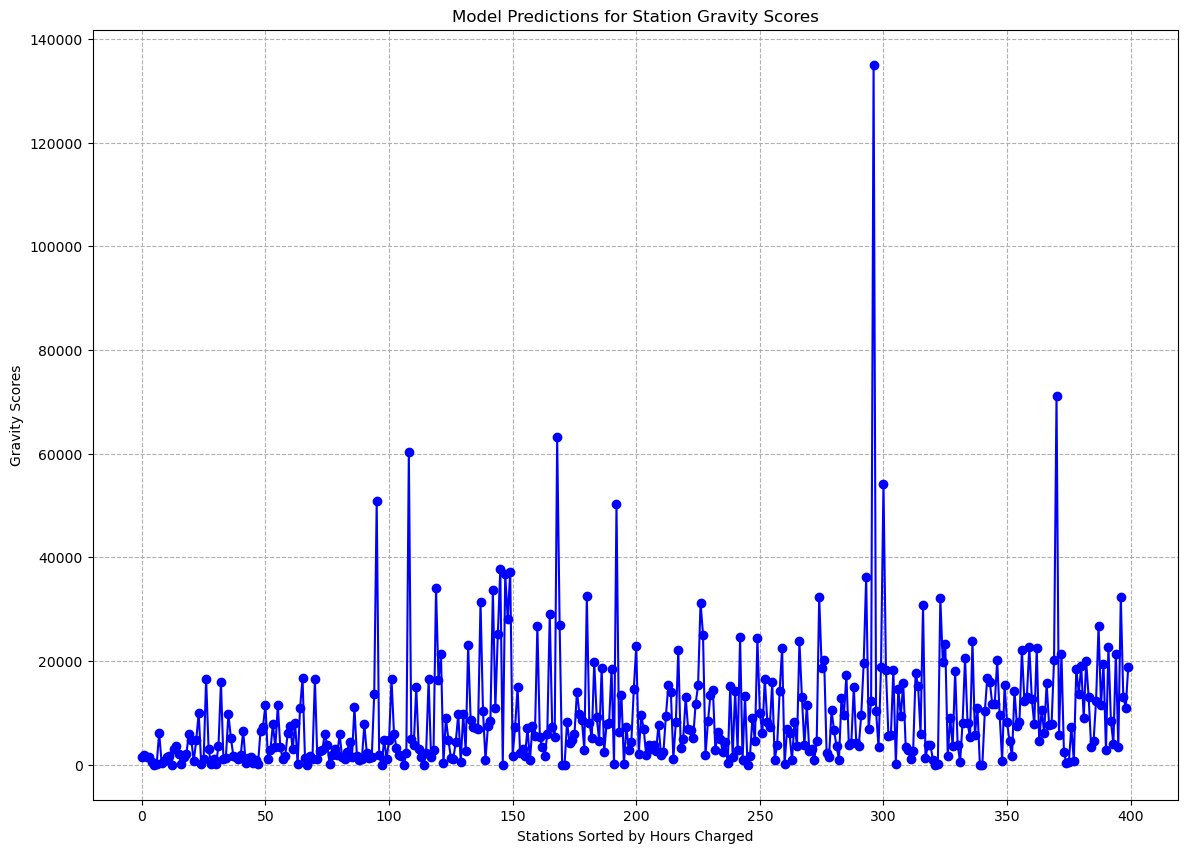

In [30]:
df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

Mean Squared Error (MSE) on scaled data: 0.020900968464070076
Root Mean Squared Error (RMSE) on scaled data: 0.14457167241223323


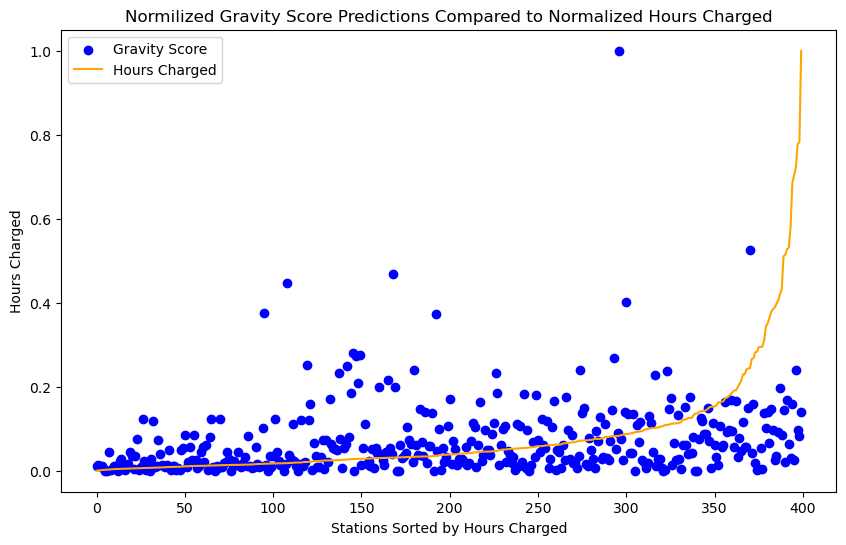

Mean Squared Error (MSE) on scaled data: 0.2648962129428531
Root Mean Squared Error (RMSE) on scaled data: 0.5146806902758768


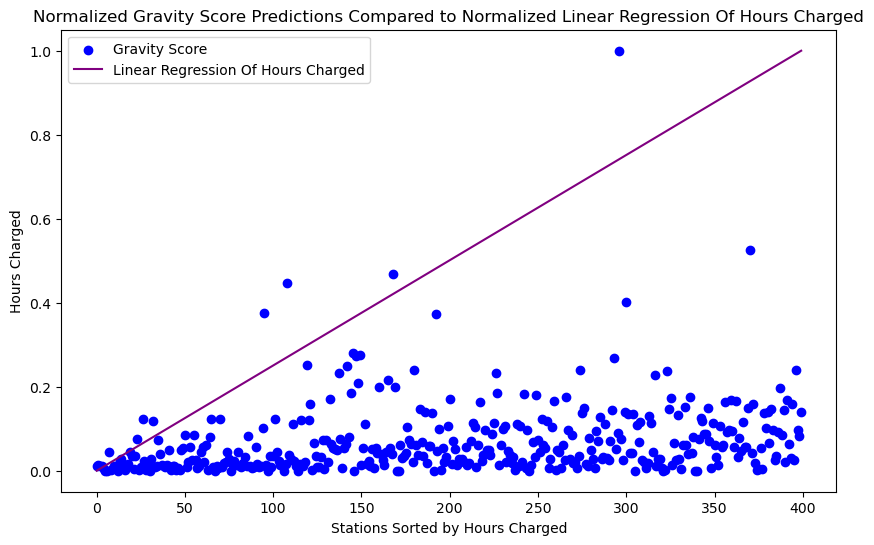

In [31]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled)
rmse = np.sqrt(mse_scaled)

mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.title('Normilized Gravity Score Predictions Compared to Normalized Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled_lin)
rmse = np.sqrt(mse_scaled)

# If you want to calculate MSE on the original scale
mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')
plt.title('Normalized Gravity Score Predictions Compared to Normalized Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()



In [32]:
def evaluate(individual):
    # Convert GA individual (set of weights) into your weights' dictionary structure
    new_weights = {name: weight for name, weight in zip(weights.keys(), individual)}

    # Write these new weights into the format your C++ program expects
    with open("weights_float.txt", "w") as file:
        for name, value in new_weights.items():
            file.write(f"{name} {value}\n")

    # Run the C++ program
    try:
        subprocess.run(['./gravityscore', 'AllStation.csv'], check=True)
        
        # Process the output CSV file
        df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
        df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

        # Assuming df_gravity['gravity'] needs to be scaled between 0 and 1 to compare with y_true
        # If df_gravity['gravity'] is already scaled, this step can be adjusted or removed
        scaler = MinMaxScaler()
        y_pred_scaled = scaler.fit_transform(df_gravity[['gravity']]).flatten()
     

        mse = mean_squared_error(y_scaled_lin, y_pred_scaled)
        rmse = np.sqrt(mse)
    except subprocess.CalledProcessError as e:
        print(f"Error running C++ program: {e}")
        rmse = float('inf')  # Assign a high MSE value in case of error

    return (rmse,)

# Genetic algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 100)  # Adjust range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(weights))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", custom_cxBlend, alpha=0.5)
toolbox.register("mutate", custom_mutGaussian, mu=0, sigma=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parameters for the GA
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
number_of_generations = 30

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("var", np.var)
stats.register("std", np.std)


population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)  # To keep track of the best individual ever found

final_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)


c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\basti\anaconda3\envs\RnDenv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	var        	std      
0  	50    	0.375417	0.322042	0.000800688	0.0282964
1  	38    	0.353061	0.3183  	0.000454744	0.0213247
2  	36    	0.340437	0.315821	0.000150854	0.0122822
3  	36    	0.32977 	0.313673	0.000137204	0.0117134
4  	46    	0.330354	0.310372	0.000381535	0.0195329
5  	36    	0.323254	0.309123	0.000223964	0.0149654
6  	36    	0.320485	0.306342	0.000245839	0.0156793
7  	41    	0.314642	0.306109	6.16506e-05	0.00785179
8  	34    	0.31748 	0.305795	0.000348004	0.0186549 
9  	37    	0.310363	0.304029	2.97871e-05	0.00545775
10 	28    	0.310875	0.304885	8.24221e-05	0.00907866
11 	33    	0.314215	0.304383	0.000290853	0.0170544 
12 	34    	0.311804	0.303798	0.000154257	0.01242   
13 	45    	0.311551	0.303349	0.000188099	0.0137149 
14 	33    	0.307723	0.303126	4.67228e-05	0.00683541
15 	43    	0.306664	0.302594	4.23976e-05	0.00651134
16 	40    	0.308164	0.301618	9.3107e-05 	0.0096492 
17 	31    	0.306629	0.301784	9.89925e-05	0.0099495 
18 	39    	0.308248	

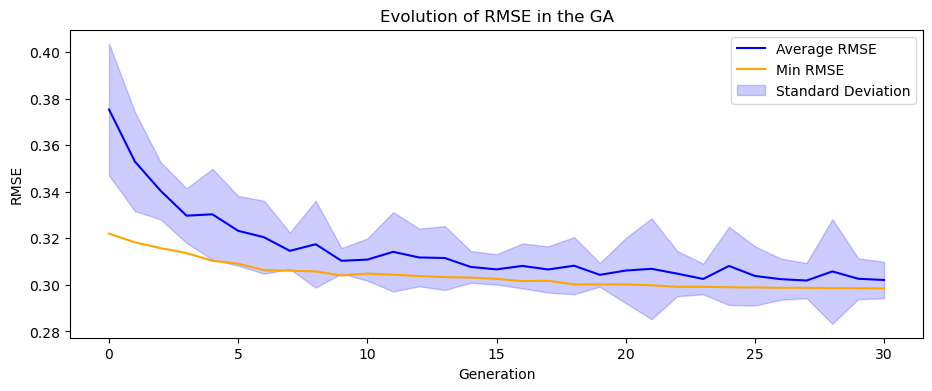

In [33]:
# Assuming logbook is already defined and populated
gen = np.array(logbook.select("gen"))
avg_mse = np.array(logbook.select("avg"))
min_mse = np.array(logbook.select("min"))
std_mse = np.array(logbook.select("std"))

# Calculate the upper and lower bounds for the shaded area
upper_bound = avg_mse + std_mse
lower_bound = avg_mse - std_mse

# Plot the graph
plt.figure(figsize=(11, 4))
plt.title("Evolution of RMSE in the GA")
plt.plot(gen, avg_mse, label="Average RMSE", color="blue")
plt.plot(gen, min_mse, label="Min RMSE", color="orange")
plt.fill_between(gen, lower_bound, upper_bound, color='blue', alpha=0.2, label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [34]:
display(hof.items)
# Assuming 'hof' is your HallOfFame object
best_individual = hof[0]  # The best individual
best_weights = {name: weight for name, weight in zip(weights.keys(), best_individual)}
best_mse = best_individual.fitness.values[0]

print("Best RMSE:", best_mse)
print("Best Weights:")
for name, weight in best_weights.items():
    print(f"{name}: {weight}")

[[11.35812086180667,
  14.982164332718167,
  0,
  76.78042333748554,
  49.41666338559867,
  60.525730668539076,
  76.97985043278558,
  0.2298505094507163,
  11.338518627183792,
  118.37533330231149,
  7.716488773572792,
  7.301824694767955,
  6.8645357478043945,
  19.035552424700008,
  108.8808883779327,
  5.425547911560379,
  107.48363904416956,
  25.197631644810922,
  0,
  15.17410764744399,
  28.928348988572797,
  50.423546862337865,
  38.19681186050203,
  57.55134362984049,
  73.68092194777888,
  0.16873695436879554,
  52.82786262662719]]

Best RMSE: 0.2985061533586075
Best Weights:
traffic_weight: 11.35812086180667
apartments_weight: 14.982164332718167
cinemas_weight: 0
clinics_weight: 76.78042333748554
colleges_weight: 49.41666338559867
communityCentres_weight: 60.525730668539076
conferenceCentres_weight: 76.97985043278558
dentists_weight: 0.2298505094507163
eventsVenues_weight: 11.338518627183792
fastFoods_weight: 118.37533330231149
hospitals_weight: 7.716488773572792
hotels_weight: 7.301824694767955
leisureFitnessCentres_weight: 6.8645357478043945
leisureStadiums_weight: 19.035552424700008
motorwayLinks_weight: 108.8808883779327
motorways_weight: 5.425547911560379
parkings_weight: 107.48363904416956
placesOfWorship_weight: 25.197631644810922
restaurants_weight: 0
shopMalls_weight: 15.17410764744399
shopSupermarkets_weight: 28.928348988572797
sportsCentres_weight: 50.423546862337865
sportsHalls_weight: 38.19681186050203
stadiums_weight: 57.55134362984049
substationMinorDistributions_weight: 73.68092194777888
theatres_

In [35]:
with open("weights_float.txt", "w") as file:
    for name, value in best_weights.items():
        file.write(f"{name} {float(value)}\n")

In [36]:
# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

C++ program output:
 Time taken: 10455 milliseconds



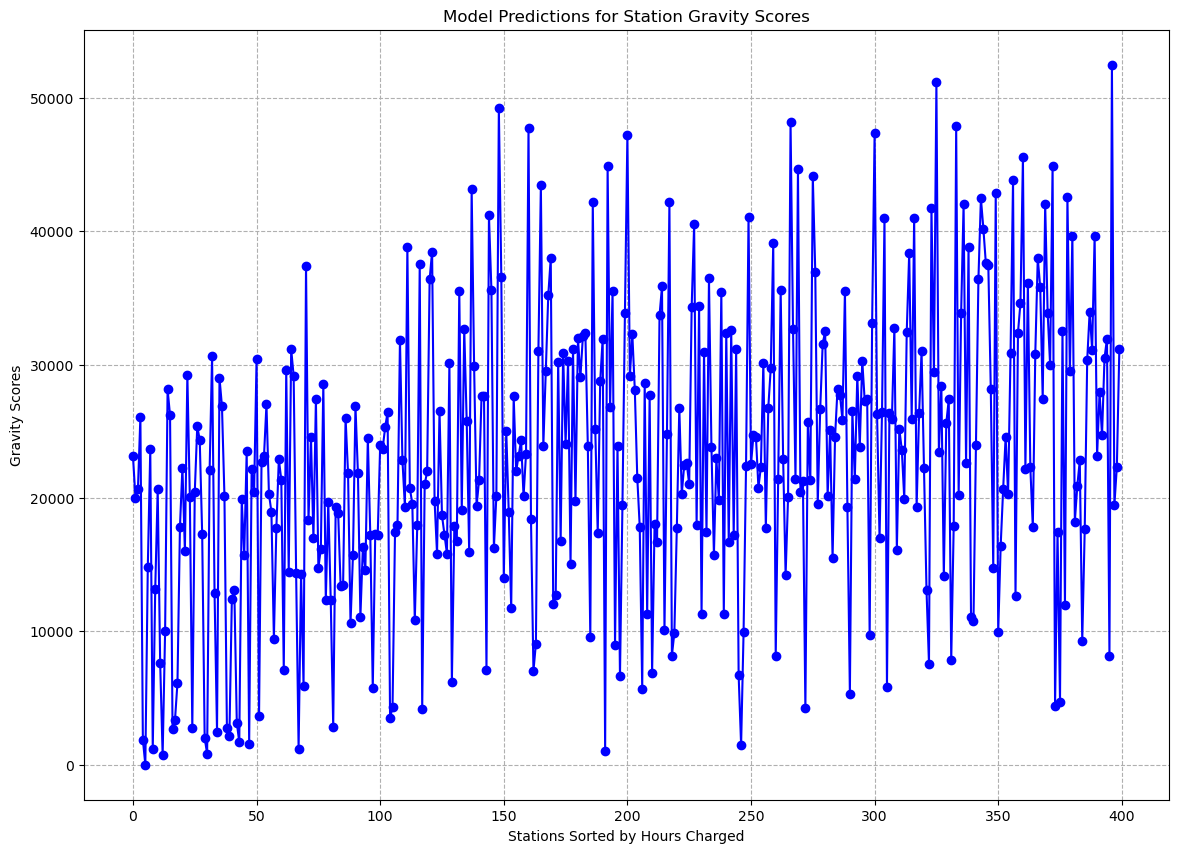

In [37]:
df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

Mean Squared Error (MSE) on scaled data: 0.17604311435657038
Root Mean Squared Error (RMSE) on scaled data: 0.4195749210290939


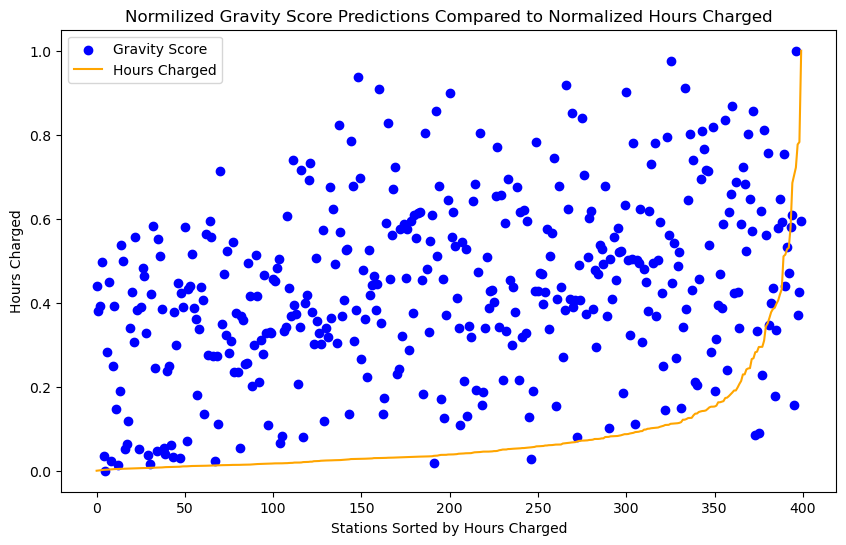

Mean Squared Error (MSE) on scaled data: 0.08910592359295247
Root Mean Squared Error (RMSE) on scaled data: 0.2985061533586075


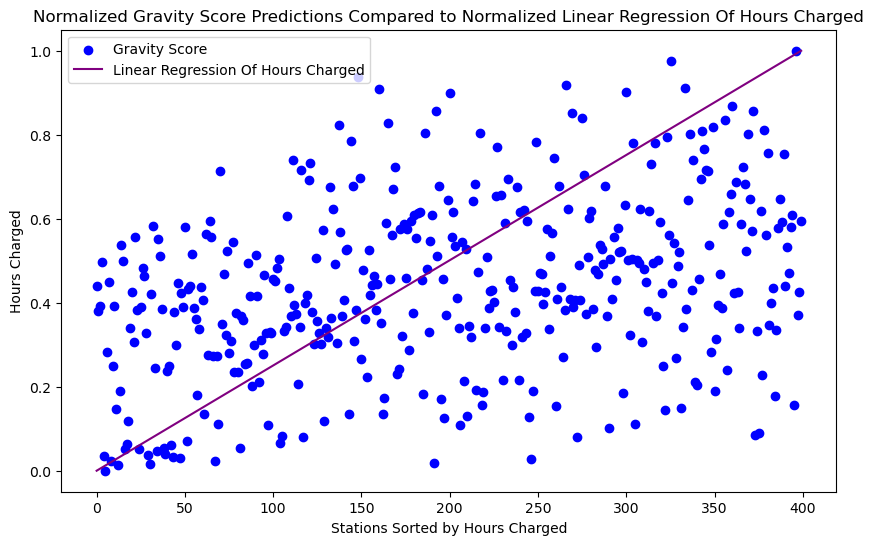

In [38]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled)
rmse = np.sqrt(mse_scaled)

mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.title('Normilized Gravity Score Predictions Compared to Normalized Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled_lin)
rmse = np.sqrt(mse_scaled)

# If you want to calculate MSE on the original scale
mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')
plt.title('Normalized Gravity Score Predictions Compared to Normalized Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


In [39]:
#make some statisct on df_gravity['gravity']
df_gravity['gravity'].describe()


count      400.000000
mean     22986.326418
std      10966.807928
min          1.844020
25%      16318.375000
50%      22603.700000
75%      30263.100000
max      52481.700000
Name: gravity, dtype: float64

C++ program output:
 Time taken: 13221 milliseconds



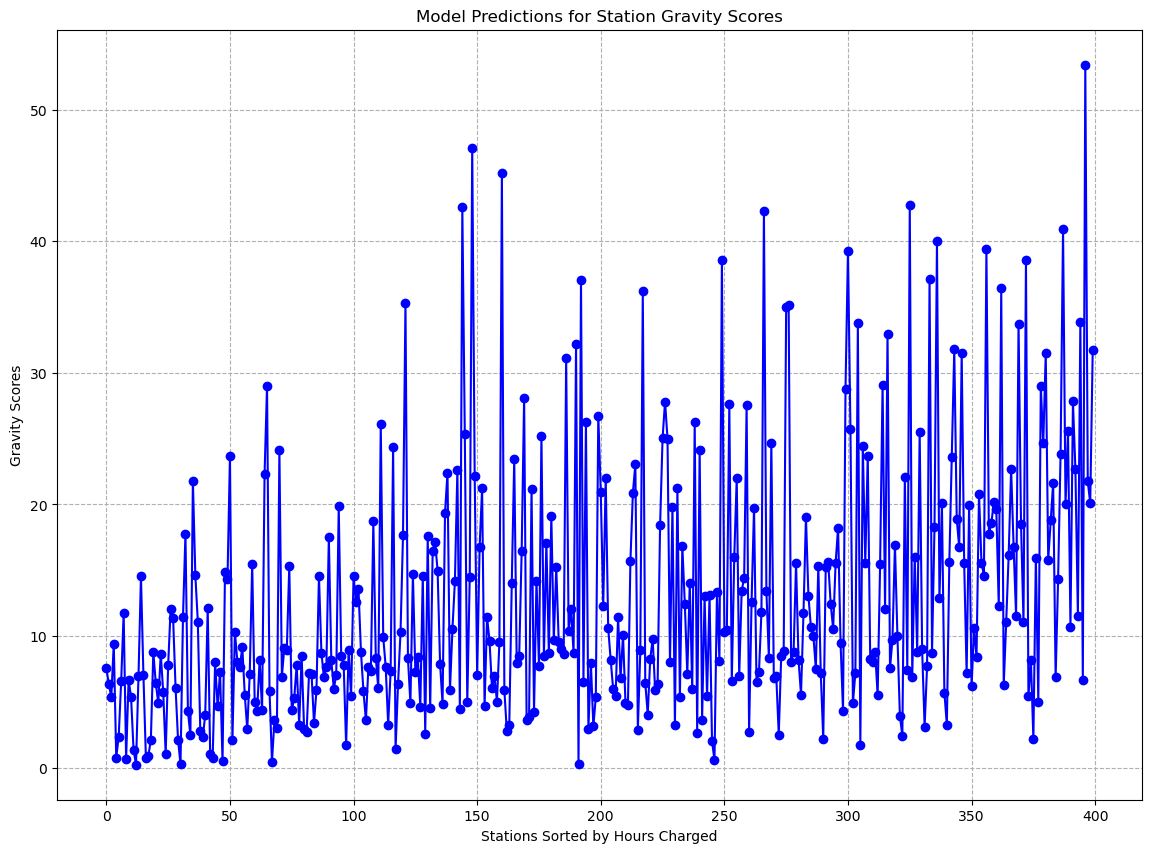

Mean Squared Error (MSE): 466.77970422944895
Root Mean Squared Error (RMSE): 21.605085147470465
NRMSE: 0.12144726734868312


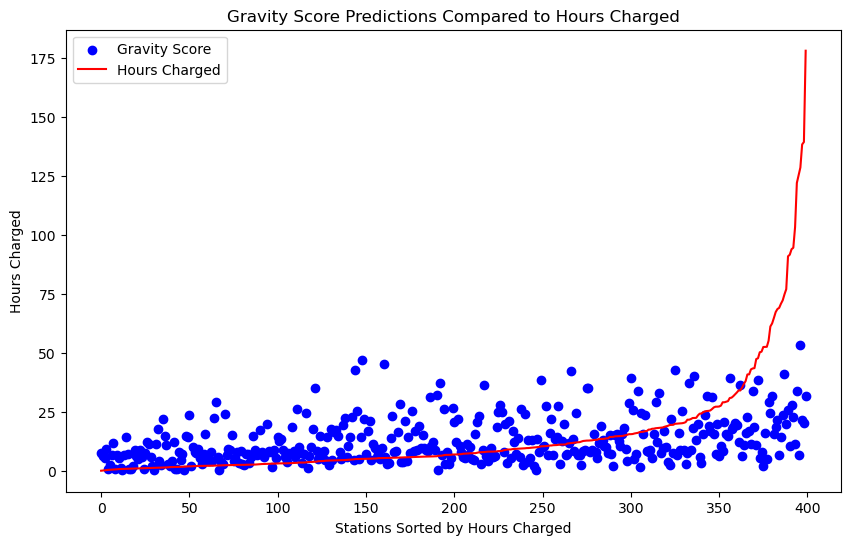

Mean Squared Error (MSE): 148.34317836260436
Root Mean Squared Error (RMSE): 12.17962143757368
NRMSE: 0.34392440231590166


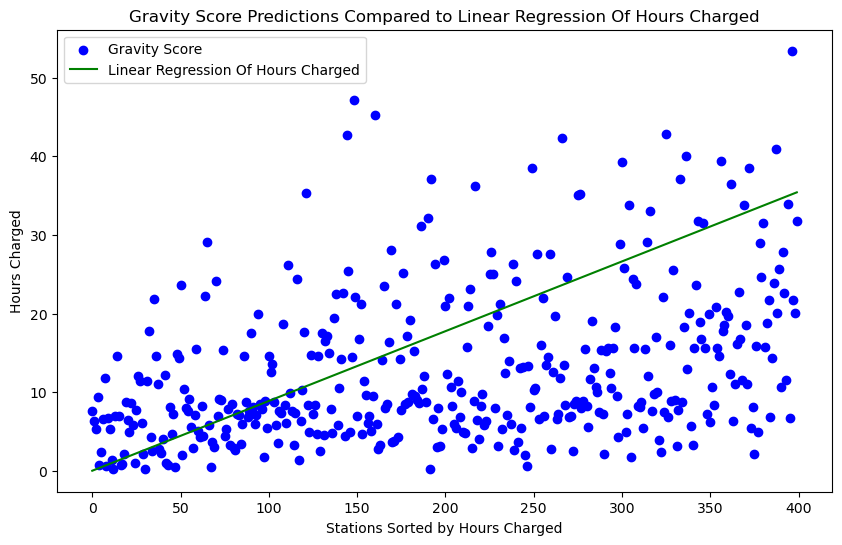

,longitude,latitude,gravity,traffic,apartments,cinemas,clinics,colleges,communityCentres,conferenceCentres,...,placesOfWorship,restaurants,shopMalls,shopSupermarkets,sportsCentres,sportsHalls,stadiums,substationMinorDistributions,theatres,universities
0,10.64840,55.5015,7.554550,0,0.000000,0.0,0.0,0.000000,0.000028,0,...,2.349290,0.000000,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
1,8.83612,56.7820,6.355940,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.079650,0.000000,0.0,0.000028,0,0.000000,0.0,0.00000,0.0,0
2,10.18240,57.0617,5.350960,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.000000,0.000000,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
3,9.12968,55.1301,9.409690,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.093145,2.359100,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
4,11.34300,55.4140,0.751763,0,0.002010,0.0,0.0,0.069046,0.000000,0,...,0.000000,0.227025,0.0,0.000150,0,0.000000,0.0,0.00000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11.36180,55.3879,6.658440,0,0.000000,0.0,0.0,0.000000,0.000004,0,...,0.028682,0.000000,0.0,0.000094,0,0.008124,0.0,0.00000,0.0,0
396,9.71694,55.5345,53.429600,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.024631,0.000000,0.0,0.000441,0,0.000000,0.0,0.00000,0.0,0
397,10.41980,55.3527,21.748500,0,0.002587,0.0,0.0,0.000000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,0.0,2.76003,0.0,0
398,12.16140,55.4893,20.089100,0,0.000000,0.0,0.0,0.739042,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,0.0,0.00000,0.0,0


longitude                        4260.222930
latitude                        22338.227800
gravity                          5184.319636
traffic                             0.000000
apartments                         15.523857
cinemas                             0.642533
clinics                            80.376644
colleges                           39.513138
communityCentres                    0.007376
conferenceCentres                   0.000000
dentists                           80.268887
eventsVenues                        5.999973
fastFoods                        1485.197006
hospitals                          10.217150
hotels                              3.623629
leisureFitnessCentres              11.675223
leisureStadiums                     0.205531
motorwayLinks                     766.718710
motorways                          31.300507
parkings                         1657.411731
placesOfWorship                    98.089361
restaurants                       294.237569
shopMalls 

C++ program output:
 Time taken: 8858 milliseconds



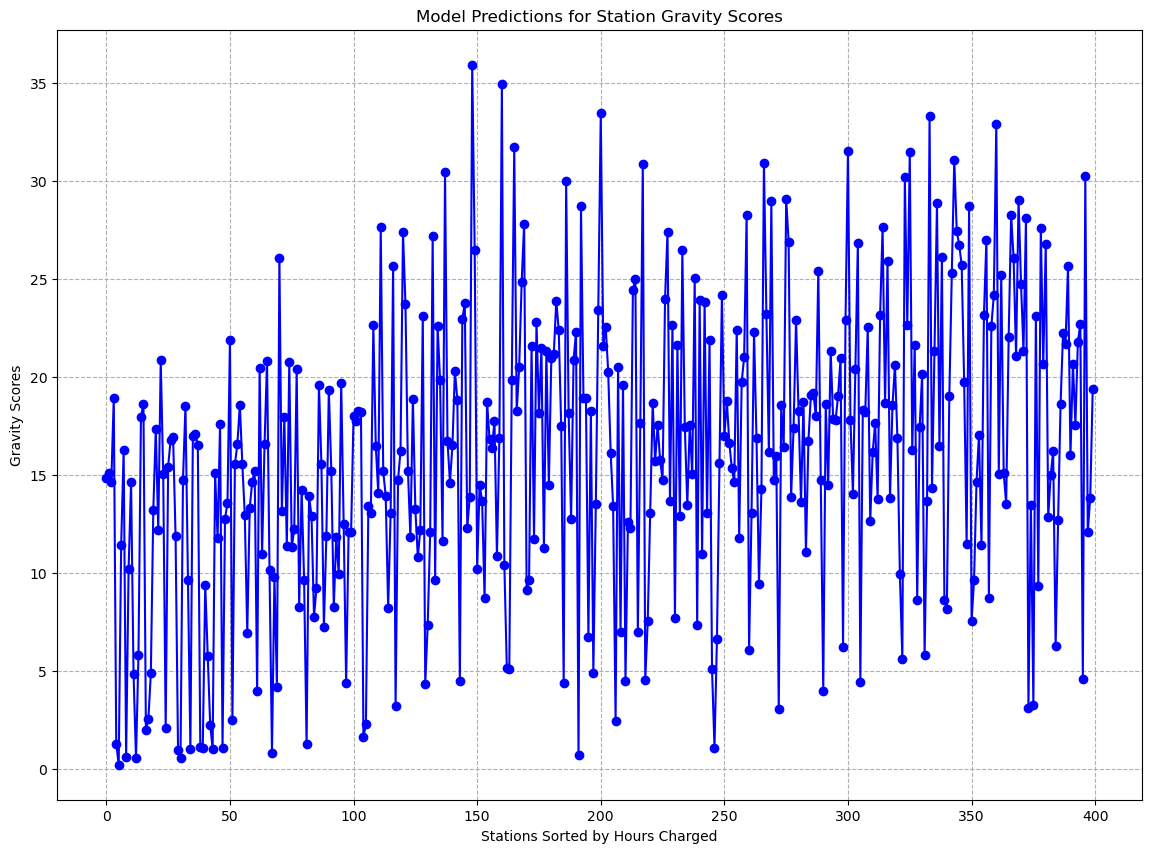

Mean Squared Error (MSE): 515.8884116794457
Root Mean Squared Error (RMSE): 22.713177049445232
NRMSE: 0.12767611266669365


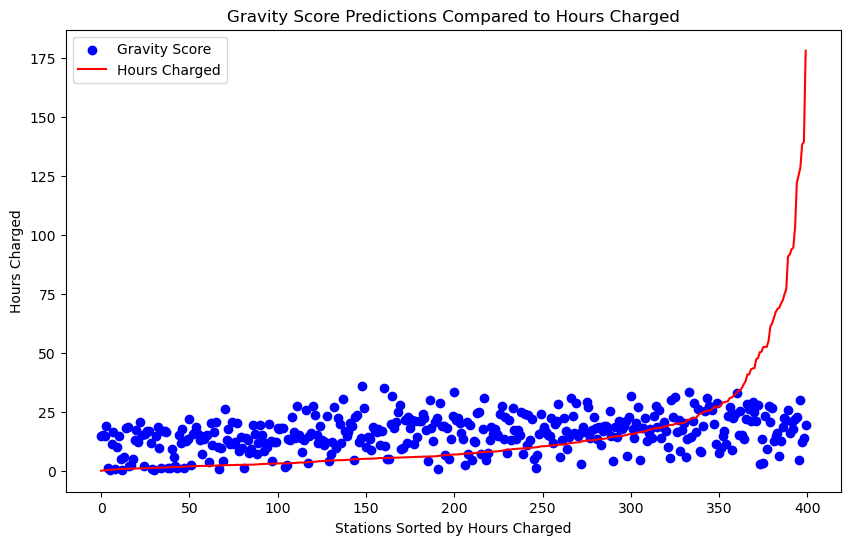

Mean Squared Error (MSE): 111.5158839884116
Root Mean Squared Error (RMSE): 10.560108142836967
NRMSE: 0.2981930842458107


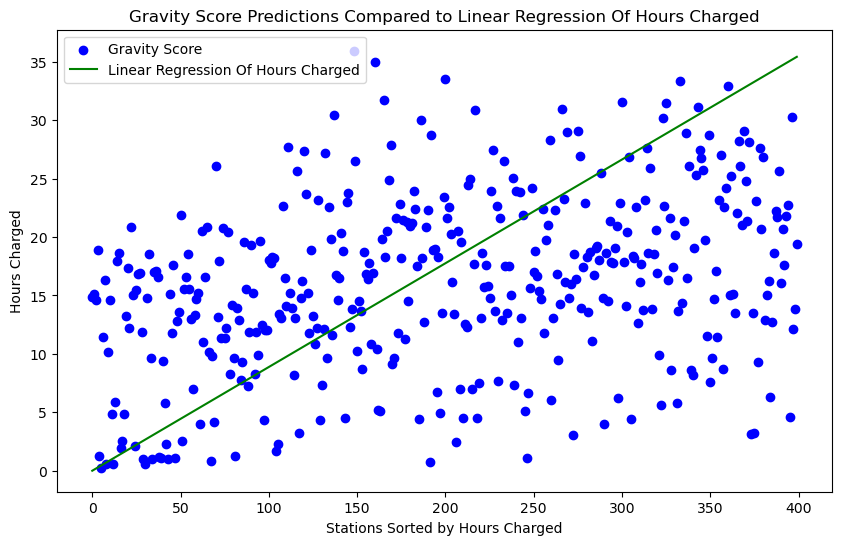

In [18]:
def nrmse(y_true, rmse_value):
    """Calculate the Normalized Root Mean Square Error."""
    range_value = np.max(y_true) - np.min(y_true)
    return rmse_value / range_value

weights = {
    "traffic_weight": 0,
    "apartments_weight": 0.0009170220089808314,
    "cinemas_weight": 0.0003695260891993867,
    "clinics_weight": 0.06816398784563084,
    "colleges_weight": 0.04516284488369832,
    "communityCentres_weight": 3.752127410133192e-06,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0.04454496428452166,
    "eventsVenues_weight": 0.00464102768317852,
    "fastFoods_weight": 0.1784694398954507,
    "hospitals_weight": 0.012237558734649497,
    "hotels_weight": 0.0030296000484235936,
    "leisureFitnessCentres_weight": 0.0029541970112504264,
    "leisureStadiums_weight": 0.0007992050029449315,
    "motorwayLinks_weight": 0.10788956583509418,
    "motorways_weight": 0.026636366560840775,
    "parkings_weight": 0.03238725958418013,
    "placesOfWorship_weight": 0.02349285891361788,
    "restaurants_weight": 0.02359104950734122,
    "shopMalls_weight": 0.047809737636703376,
    "shopSupermarkets_weight": 2.1277026279482327e-05,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0.003479494421348886,
    "stadiums_weight": 0.10188558996882979,
    "substationMinorDistributions_weight": 0.05602740409259743,
    "theatres_weight": 0.005573301139133856,
    "universities_weight": 0
}



with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_original, y)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
nrmse_value = nrmse(y_original, rmse)
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_lin, y)
rmse = np.sqrt(mse)
nrmse_value = nrmse(y_lin, rmse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

weights_all_names= {
    "traffic_weight": 0,
    "apartments_weight": 0.0009170220089808314,
    "cinemas_weight": 0.0003695260891993867,
    "clinics_weight": 0.06816398784563084,
    "colleges_weight": 0.04516284488369832,
    "communityCentres_weight": 3.752127410133192e-06,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0.04454496428452166,
    "eventsVenues_weight": 0.00464102768317852,
    "fastFoods_weight": 0.1784694398954507,
    "hospitals_weight": 0.012237558734649497,
    "hotels_weight": 0.0030296000484235936,
    "leisureFitnessCentres_weight": 0.0029541970112504264,
    "leisureStadiums_weight": 0.0007992050029449315,
    "motorwayLinks_weight": 0.10788956583509418,
    "motorways_weight": 0.026636366560840775,
    "parkings_weight": 0.03238725958418013,
    "placesOfWorship_weight": 0.02349285891361788,
    "restaurants_weight": 0.02359104950734122,
    "shopMalls_weight": 0.047809737636703376,
    "shopSupermarkets_weight": 2.1277026279482327e-05,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0.003479494421348886,
    "stadiums_weight": 0.10188558996882979,
    "substationMinorDistributions_weight": 0.05602740409259743,
    "theatres_weight": 0.005573301139133856,
    "universities_weight": 0
}

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

# Extracting names and removing '_weight' suffix
new_names = [name.replace('_weight', '') for name in weights_all_names.keys()]

# Generating new column names for df_gravity
# This includes keeping the original names for columns not being replaced
new_column_names = df_gravity.columns[:3].tolist() + new_names[:len(df_gravity.columns) - 3]

# Renaming the columns in df_gravity
df_gravity.columns = new_column_names

display(df_gravity)
#display the sum of each column
display(df_gravity.sum())
df_gravity.to_csv('gravityScoresWithDetails.csv')



weights = {
    "traffic_weight": 0,
    "apartments_weight": 0.013020803620594542,
    "cinemas_weight": 8.914836506796038e-05,
    "clinics_weight": 0.05044043248665535,
    "colleges_weight": 0.023629078699960445,
    "communityCentres_weight": 0.06052956661123591,
    "conferenceCentres_weight": 0.002228864000721831,
    "dentists_weight": 0.012060727058256915,
    "eventsVenues_weight": 0.0078254979360184,
    "fastFoods_weight": 0.08438839739569119,
    "hospitals_weight": 0.006203608183887592,
    "hotels_weight": 0.0003179888631597091,
    "leisureFitnessCentres_weight": 0.005110500724733416,
    "leisureStadiums_weight": 0.0031516632035784825,
    "motorwayLinks_weight": 0.044317712816342156,
    "motorways_weight": 0.029215833567085046,
    "parkings_weight": 0.08162039103927429,
    "placesOfWorship_weight": 0.0010795097351406447,
    "restaurants_weight": 0.002205968749757865,
    "shopMalls_weight": 0,
    "shopSupermarkets_weight": 0.011643741100199712,
    "sportsCentres_weight": 0.0011138701504398237,
    "sportsHalls_weight": 0.03861830014075491,
    "stadiums_weight": 0.005513851266402256,
    "substationMinorDistributions_weight": 0.053280480432216046,
    "theatres_weight": 0.006458047190017242,
    "universities_weight": 0
}

with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_original, y)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
nrmse_value = nrmse(y_original, rmse)
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_lin, y)
rmse = np.sqrt(mse)
nrmse_value = nrmse(y_lin, rmse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()
